<a href="https://colab.research.google.com/github/CamiloLon/Evaluacion_2021-1/blob/main/Tareas/1000417189/Entrega_tareas_2021/RepasoRaices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problemas 

#1. Area 
Hallar el área de un segmento circular cuya area sea igual a una cuarta parte del área del circulo. Para la solución se sugiere lo siguiente:

a) Encontrar la ecuacion trascendental.

b) Con la ecuación anterior, definir una funcion $f(\theta)=0$. Emplee la funcion labmda de python.

c) Construir una data frame de pandas con la columna "theta" con 1000 registros(filas) entre $[-2\pi, 2\pi]$. Sugerencia, para construir el data frame emplee la función linspace como sigue : np.linspace(-2\*np.pi, 2\*np.pi, 1000 )

d) Construir una segunda columna titulada "F_theta" con los registros f(theta)

f) Realice un gráfico de  "F_theta" vs "theta". Identifique el intervalo de la raiz.

Estime el valor del ángulo empleando los siguientes metodos(Emplee  la documentacion):

g) [Bisección](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html)

h) [Newton-Rapshon](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html)

i) [Secante](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.newton.html) 

j) [Punto Fijo](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fixed_point.html)







\begin{equation}
A = As - 2\frac{(r\cos\theta/2 )(r\sin\theta/2)}{2} 
\end{equation}


.

.

.




\begin{equation}
\theta-\sin \theta = \frac{\pi}{2}
\end{equation}



\begin{equation}
f(\theta)= \theta- \sin \theta - \frac{\pi}{2}=0
\end{equation}



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from scipy import optimize

In [ ]:
f = lambda theta: theta-np.sin(theta)-np.pi/2

In [ ]:
theta = np.linspace(-2*np.pi, 2*np.pi, 1000)


In [ ]:
df = pd.DataFrame()

df["theta"] = theta
df["F_theta"] = f(theta)
df

,theta,F_theta
0,-6.283185,-7.853982
1,-6.270606,-7.853981
2,-6.258027,-7.853979
3,-6.245448,-7.853973
4,-6.232870,-7.853960
...,...,...
995,6.232870,4.712368
996,6.245448,4.712380
997,6.258027,4.712386
998,6.270606,4.712389


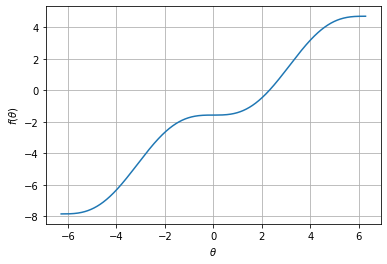

In [ ]:
plt.figure()
plt.plot(df["theta"], df["F_theta"] )
plt.xlabel("$\\theta$")
plt.ylabel("$f(\\theta)$")
plt.grid()
plt.show()

In [ ]:
root = optimize.bisect(f, 0, 4)
print(f"EL ángulo es: {root} ")

EL ángulo es: 2.309881460010729 


In [ ]:
#Método Newton-Raphson

#Derivada de f:
fp= lambda theta: 1-np.cos(theta)
#Resultado
optimize.newton(f, 2, fprime=fp, maxiter=1000)

2.3098814600100575

In [ ]:
#Método de la secante
optimize.newton(f, np.sqrt(2))

2.309881460010057

In [ ]:
#Método de punto fijo

#Función g(x)=x-f(x):
g=lambda theta: theta - (theta-np.sin(theta)-np.pi/2)
#Resultado
optimize.fixed_point(g,0)

array(2.30988146)

In [ ]:
np.rad2deg(root)

132.3464588341314




# 2. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.









In [ ]:

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u, g)  #Parametros en tupla.

In [ ]:

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u, g):
  T1 = u * t * np.cos(alpha) #Termino 1
  T2 = (1./b)*(v0*np.cos(theta) - u*np.cos(alpha) ) #Termino 2
  T3 = (1 - np.e**(-b*t)) #Termino 3

  return T1 + T2*T3 
    

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u, g):

  T1 = (1./b)*(g/b + v0*np.sin(theta) - u*np.sin(alpha) ) #termino 1
  T2 = (1 - np.e**(- b * t)) #termino 2
  T3 = (g / b - u *  np.sin(alpha))*t #termino 3

  return T1* T2 - T3
  


In [ ]:
T = np.linspace(0, 8.2,50) #Tiempo 
x = pos_x(T, theta, *Params)
y = pos_y(T, theta, *Params) 
pos = { "X": x , "Y": y, "Tiempo": T }
df = pd.DataFrame.from_dict(pos)
df

,X,Y,Tiempo
0,0.000000,0.000000,0.000000
1,7.049363,6.933466,0.167347
2,13.998155,13.535855,0.334694
3,20.847215,19.809926,0.502041
4,27.597373,25.758414,0.669388
5,34.249453,31.384034,0.836735
6,40.804274,36.689474,1.004082
7,47.262644,41.677403,1.171429
8,53.625368,46.350467,1.338776
9,59.893243,50.711288,1.506122


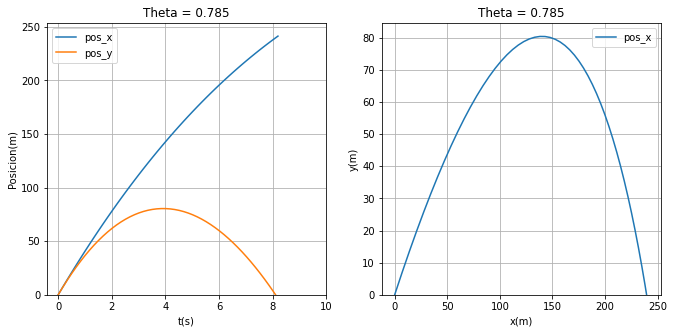

In [ ]:
plt.figure(figsize=(11,5))

plt.subplot(121)
plt.plot(df["Tiempo"], df["X"], label="pos_x") 
plt.plot(df["Tiempo"], df["Y"], label="pos_y")
plt.ylim(bottom=0)
plt.xlim(right=10)
plt.xlabel("t(s)")
plt.ylabel("Posicion(m)")
plt.legend()
plt.grid()
plt.title("Theta = " + str("%.3lf"%theta))

plt.subplot(122)

plt.plot(df["X"], df["Y"], label="pos_x") 
plt.ylim(bottom=0)
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.legend()
plt.title("Theta = " + str("%.3lf"%theta))
plt.grid()


plt.show()

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.

In [ ]:
#Segunda solución de y=0 (No trivial)
Y=lambda t: pos_y(t, theta, *Params)
T_end=optimize.newton(Y,10)
T_end

8.11162702209557

In [ ]:
#Posición en x al caer:
pos_x(T_end, theta, *Params)

239.60614945520706

In [ ]:
#Ángulos de 5 en 5 desde 10 hasta 90
angs=np.linspace(10,90,17)
angs

array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.,
       75., 80., 85., 90.])

In [ ]:
X=lambda t: pos_x(t,45,*Params)
Xx=lambda t: pos_x(t,5,*Params)
M=[X,Xx]
M

[<function __main__.<lambda>>, <function __main__.<lambda>>]

In [ ]:
#Array vacío
# B=np.st(17)
print(type(Y))
for i in range(0,17):
  # Definir una función nueva cada vez con un nuevo ángulo
  B[i]='a'#(lambda t: pos_y(t, np.deg2rad(angs[i]), *Params))
opti= np.vectorize(optimize.newton)

opti(Y,10)
Y[9](11.204)
#Evaluar pos_x en cada tiempo final y ángulo correspondiente
# R=pos_x(T_end, np.deg2rad(angs), *Params)
# R

<class 'builtin_function_or_method'>


ValueError: ignored

In [ ]:
def one1():
    print("Method one1 called")
def one2():
    print("Method one2 called")
def one3():
    print("Method one3 called")
methodDictionary = {1: one1, 2:one2, 3: one3}
method1 = methodDictionary[1]
method1()
method2 = methodDictionary[2]
method2()
method3 = methodDictionary[3]
method3()

Method one1 called
Method one2 called
Method one3 called


In [ ]:
#Array vacío
T_end=np.zeros(17)
for i in range(0,17):
  # Definir una función nueva cada vez con un nuevo ángulo
  Y  = lambda t: pos_y(t, np.deg2rad(angs[i]), *Params)
  T_end[i] = optimize.newton(Y,10)

R=pos_x(T_end, np.deg2rad(angs), *Params)
R

array([114.09205021, 159.11424792, 195.25160684, 222.1925717 ,
       239.86601038, 248.41385426, 248.16428008, 239.60614946,
       223.36511298, 200.18155773, 170.89041443, 136.40273087,
        97.68884772,  55.76297185,  11.66892048, -33.53319794,
       -78.7796008 ])

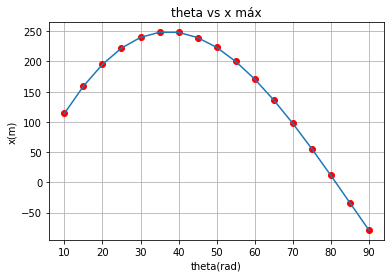

In [ ]:
# plt.figure()
plt.plot(angs,R,'ro')
plt.plot(angs,R)

plt.title('theta vs x máx')
plt.xlabel('theta(rad)')
plt.ylabel('x(m)')
plt.grid()

In [ ]:
from scipy.interpolate import lagrange
data=(angs, R)
polLag= lagrange(angs,R)

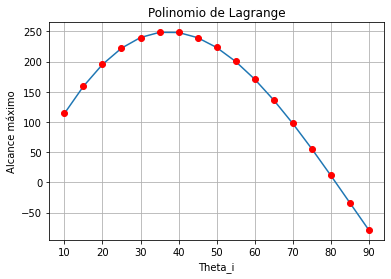

           16             15             14             13
5.474e-33 x  - 6.028e-30 x  + 3.292e-27 x  - 1.132e-24 x 
              12             11             10             9
 + 2.697e-22 x  - 4.563e-20 x  + 5.159e-18 x  - 2.505e-16 x
              8            7            6             5             4
 - 3.648e-14 x + 9.69e-12 x - 9.39e-10 x - 2.373e-08 x + 2.179e-05 x
             3          2
 - 0.001791 x - 0.1256 x + 12.82 x + 3.921e-07


In [ ]:
plt.plot(angs, polLag(angs), angs, R, 'ro')
plt.title('Polinomio de Lagrange')
plt.grid()
plt.xlabel('Theta_i')
plt.ylabel('Alcance máximo')
plt.show()
print(np.poly1d(polLag))